In [3]:
%load_ext autoreload
%autoreload 2

In [81]:
import sklearn.datasets
from NN_tools import *
from NN_train import *

# Classification

In [76]:
# Generate 2D random dataset
np.random.seed(0)
X_moons, y_moons = sklearn.datasets.make_moons(500, noise=0.20)
X_circle, y_circle = sklearn.datasets.make_circles(noise=0.2, factor=0.5, random_state=1,n_samples=300)

#importing monks datasets
path = "input/"

monks1_train = pd.read_csv(path + "monk1_oneofk.train", delimiter = " ", )
monks1_train_y = monks1_train["target"].values
monks1_train_x = monks1_train.drop(["target"],axis = 1).values
monks1_test = pd.read_csv(path + "monk1_oneofk.test", delimiter = " ", )
monks1_test_y = monks1_train["target"].values
monks1_test_x = monks1_train.drop(["target"],axis = 1).values

monks2_train = pd.read_csv(path + "monk2_oneofk.train", delimiter = " ", )
monks2_train_y = monks2_train["target"].values
monks2_train_x = monks2_train.drop(["target"],axis = 1).values
monks2_test = pd.read_csv(path + "monk2_oneofk.test", delimiter = " ", )
monks2_test_y = monks2_train["target"].values
monks2_test_x = monks2_train.drop(["target"],axis = 1).values

monks3_train = pd.read_csv(path + "monk3_oneofk.train", delimiter = " ", )
monks3_train_y = monks3_train["target"].values
monks3_train_x = monks3_train.drop(["target"],axis = 1).values
monks3_test = pd.read_csv(path + "monk3_oneofk.test", delimiter = " ", )
monks3_test_y = monks3_train["target"].values
monks3_test_x = monks3_train.drop(["target"],axis = 1).values

In [ ]:
model_moons = train_model(X = X_moons, y = y_moons,
                          neurons_hidden=5,reg_lambda=0.01,
                          lr=0.4, epochs=4000, momentum_alpha=0.4)

plot_decision_boundary(model=model_moons, X=X_moons, y=y_moons)

## Monks 1

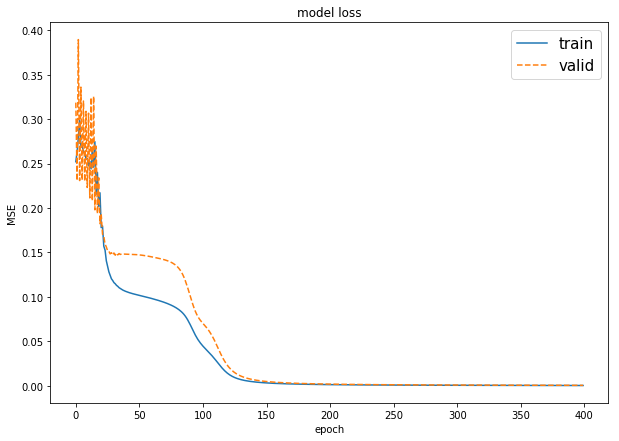

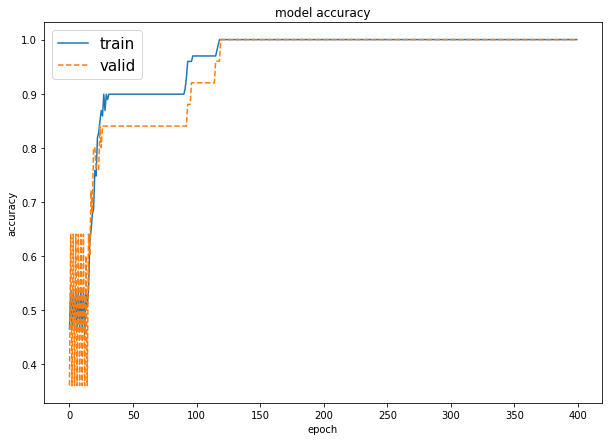

training set MSE 0.0021
training set accuracy: 100.0%
test set MSE 0.4693
test set accuracy: 100.0%


In [84]:
# best with: neurons_hidden=3, epochs= 400, momentum_alpha=0.5, lr=0.3, reg_lambda=0.0)
monks1_model= train_model(X=monks1_train_x, y=monks1_train_y, neurons_hidden=3,
                           epochs= 400, momentum_alpha=0.5, lr=0.3, reg_lambda=0.0, validation_split = 0.2)

plot_loss_accuracy(monks1_model)


# devo prima riallenare il modello su tutto il training set (tr + vl)
monks1_model = train_model(X=monks1_train_x, y=monks1_train_y, neurons_hidden=3,
                           epochs= 400, momentum_alpha=0.5, lr=0.3, reg_lambda=0.0, validation_split = 0.0)
    
    #### train ####
#MSE e accuracy sul training set (tr + vl)
print "training set MSE %01.4f" % (monks1_model['loss_values_train'][-1])
print "training set accuracy: %.1f% %" % (monks1_model['accuracy_values_train'][-1] * 100.0)

    #### test ####
#MSE e accuracy sul test set
output_test = predict_values(monks1_model, monks1_test_x) #ottengo i risultati del test set
output_test_binary = map(lambda x: 0 if (x<0.5) else 1, output_test)
print "test set MSE %01.4f" % (MSE(y_pred=output_test, y_true=monks1_test_y))
print "test set accuracy: %.1f% %" % (accuracy_score(y_pred=output_test_binary, y_true=monks1_test_y) * 100.0) #li passo insieme alle etichette 

## Monks 2

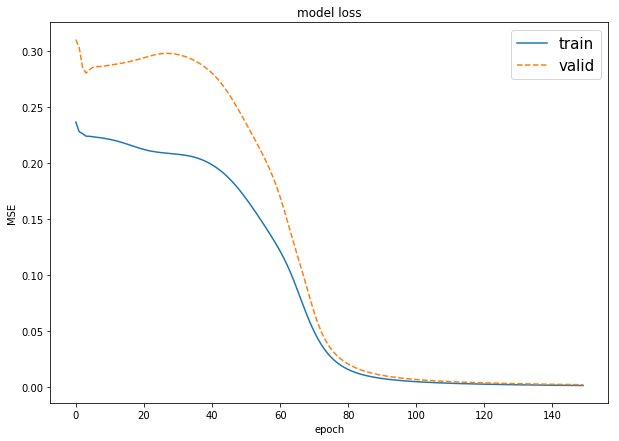

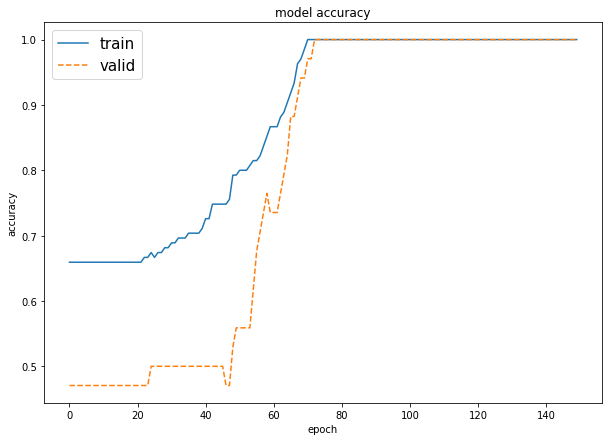

training set MSE 0.0010
training set accuracy: 100.0%
test set MSE 0.4423
test set accuracy: 100.0%


In [82]:
# best with: neurons_hidden=4, epochs= 150, momentum_alpha=0.7, lr=0.1, reg_lambda=0.0)
monks2_model = train_model(X=monks2_train_x, y=monks2_train_y, neurons_hidden=4,
                           epochs= 150, momentum_alpha=0.7, lr=0.1, reg_lambda=0.0, validation_split = 0.2)

plot_loss_accuracy(monks2_model)

# devo prima riallenare il modello su tutto il training set (tr + vl)
monks2_model = train_model(X=monks2_train_x, y=monks2_train_y, neurons_hidden=4,
                           epochs= 150, momentum_alpha=0.7, lr=0.1, reg_lambda=0.0, validation_split = 0.0)
    
    #### train ####
#MSE e accuracy sul training set (tr + vl)
print "training set MSE %01.4f" % (monks2_model['loss_values_train'][-1])
print "training set accuracy: %.1f% %" % (monks2_model['accuracy_values_train'][-1] * 100.0)

    #### test ####
#MSE e accuracy sul test set
output_test = predict_values(monks2_model, monks2_test_x) #ottengo i risultati del test set
output_test_binary = map(lambda x: 0 if (x<0.5) else 1, output_test)
print "test set MSE %01.4f" % (MSE(y_pred=output_test, y_true=monks2_test_y))
print "test set accuracy: %.1f% %" % (accuracy_score(y_pred=output_test_binary, y_true=monks2_test_y) * 100.0) #li passo insieme alle etichette 

## Monks 3

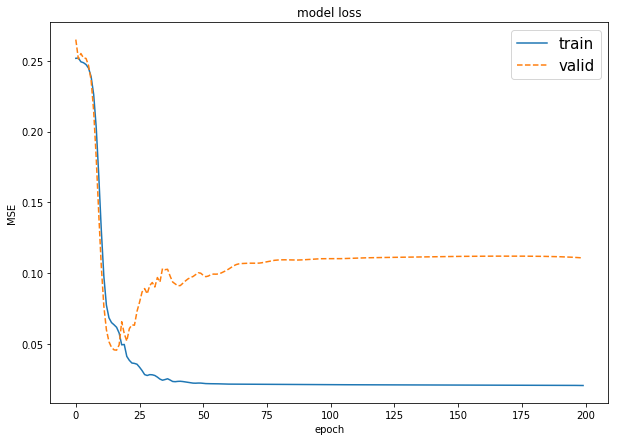

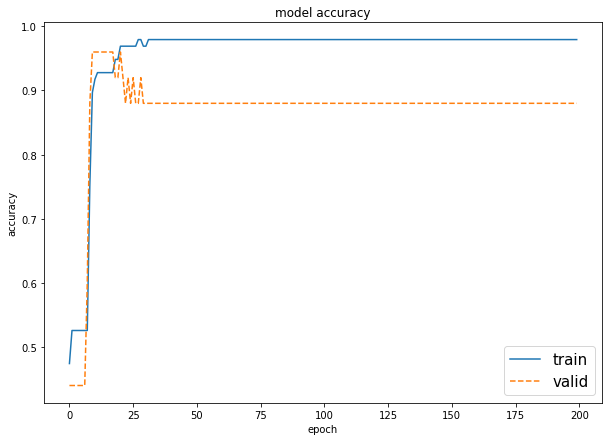

training set MSE 0.0249
training set accuracy: 97.5%
test set MSE 0.4948
test set accuracy: 97.5%


In [11]:
# best with: neurons_hidden=3, epochs=200, momentum_alpha=0.9, lr=0.2, reg_lambda=0.0)
monks3_model = train_model(X=monks3_train_x, y=monks3_train_y, neurons_hidden=3,
                           epochs= 200, momentum_alpha= 0.9, lr=0.2, reg_lambda=0.0, validation_split = 0.2)

plot_loss_accuracy(monks3_model)

# devo prima riallenare il modello su tutto il training set (tr + vl)
monks3_model = train_model(X=monks3_train_x, y=monks3_train_y, neurons_hidden=3,
                           epochs= 200, momentum_alpha=0.9, lr=0.2, reg_lambda=0.0, validation_split = 0.0)
    
    #### train ####
#MSE e accuracy sul training set (tr + vl)
print "training set MSE %01.4f" % (monks3_model['loss_values_train'][-1])
print "training set accuracy: %.1f% %" % (monks3_model['accuracy_values_train'][-1] * 100.0)

    #### test ####
#MSE e accuracy sul test set
output_test = predict_values(monks3_model, monks3_test_x) #ottengo i risultati del test set
output_test_binary = map(lambda x: 0 if (x<0.5) else 1, output_test)
print "test set MSE %01.4f" % (MSE(y_pred=output_test, y_true=monks3_test_y))
print "test set accuracy: %.1f% %" % (accuracy_score(y_pred=output_test_binary, y_true=monks3_test_y) * 100.0) #li passo insieme alle etichette 

## Monks 3 (reg)

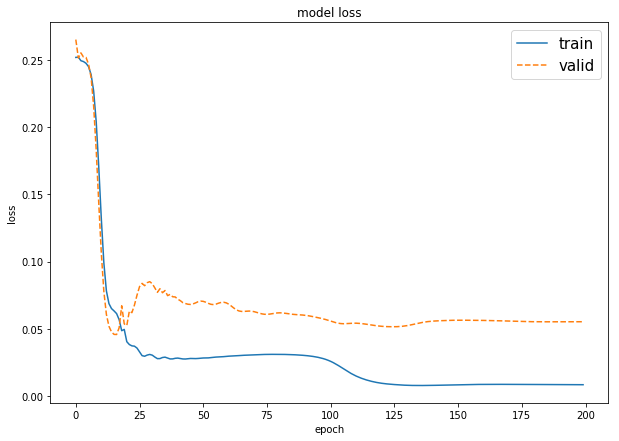

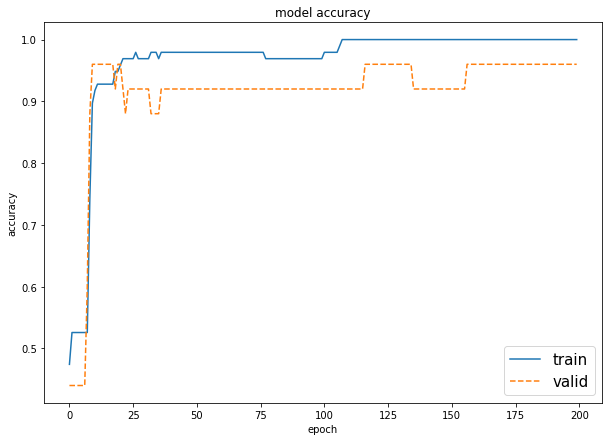

training set MSE 0.0087
training set accuracy: 100.0%
test set MSE 0.4489
test set accuracy: 100.0%


In [6]:
# best with: neurons_hidden=3, epochs=200, momentum_alpha=0.9, lr=0.2, reg_lambda=0.01)
monks3_model = train_model(X=monks3_train_x, y=monks3_train_y, neurons_hidden=3,
                           epochs= 200, momentum_alpha= 0.9, lr=0.2, reg_lambda=0.01, validation_split = 0.2)

plot_loss_accuracy(monks3_model)

# devo prima riallenare il modello su tutto il training set (tr + vl)
monks3_model = train_model(X=monks3_train_x, y=monks3_train_y, neurons_hidden=3,
                           epochs= 200, momentum_alpha=0.9, lr=0.2, reg_lambda=0.01, validation_split = 0.0)
    
    #### train ####
#MSE e accuracy sul training set (tr + vl)
print "training set MSE %01.4f" % (monks3_model['loss_values_train'][-1])
print "training set accuracy: %.1f% %" % (monks3_model['accuracy_values_train'][-1] * 100.0)

    #### test ####
#MSE e accuracy sul test set
output_test = predict_values(monks3_model, monks3_test_x) #ottengo i risultati del test set
output_test_binary = map(lambda x: 0 if (x<0.5) else 1, output_test)
print "test set MSE %01.4f" % (MSE(y_pred=output_test, y_true=monks3_test_y))
print "test set accuracy: %.1f% %" % (accuracy_score(y_pred=output_test_binary, y_true=monks3_test_y) * 100.0) #li passo insieme alle etichette 


# ML CUP #

In [58]:
from sklearn.model_selection import train_test_split

list_column = list('input' + str(i) for i in range(1,11))
cup_tr = pd.read_csv("input/ML-CUP17-TR.csv", skiprows=9, names= list_column +(['target_x','target_y']))
cup_X = cup_tr.drop(['target_x','target_y'],axis = 1).values
cup_y = cup_tr[['target_x','target_y']].values
cup_tr_X, cup_ts_X, cup_tr_y, cup_ts_y = train_test_split(cup_X, cup_y, test_size=0.2, shuffle=True)

#normalize input - test_set normalizzato con i parametri usati per normalizzare il tr_set
mean, std_dev = np.mean(cup_tr_X,axis=0), np.std(cup_tr_X,axis=0)
cup_tr_X = (cup_tr_X - mean) / std_dev
cup_ts_X = (cup_ts_X - mean) / std_dev


#blind test set - file separato
cup_blind_ts = pd.read_csv("input/ML-CUP17-TS.csv", skiprows=9, names= list_column)
cup_blind_ts_X = cup_blind_ts.values
cup_blind_ts_X = (cup_blind_ts_X - mean) / std_dev

#### prime prove di funzionamento, con parametri provati a mano e validazione fatta con Hold-out

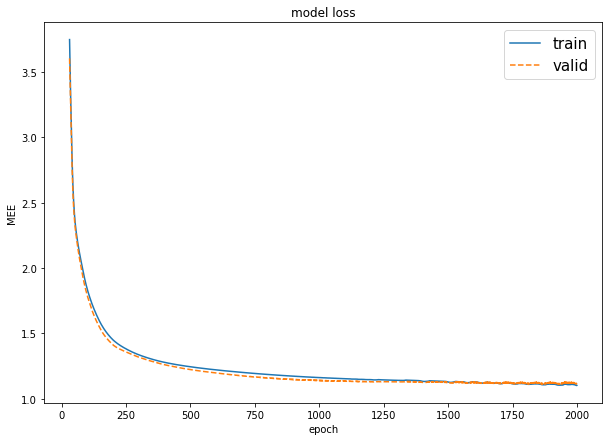

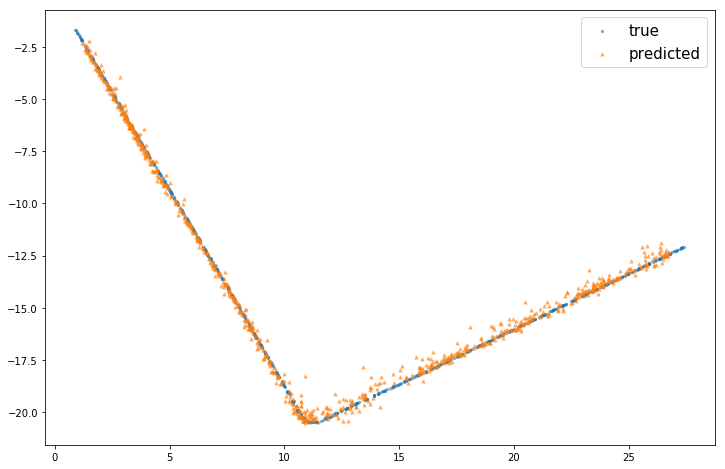

MEE (validation) = 1.11331399508


In [59]:
#good with= validation_split=0.2 ,lr=0.3, neurons_hidden=16, momentum_alpha=0.8, epochs=1800, reg_lambda=0.002

mlcup_model = train_model_regression(cup_tr_X, cup_tr_y, validation_split=0.2 ,lr=0.25, neurons_hidden=16,
                                     momentum_alpha=0.5, epochs=2000, reg_lambda=0.001)
mlcup_predicted = predict_values(model=mlcup_model, X=cup_tr_X, classification= False)
plot_loss_accuracy(model=mlcup_model, print_accuracy=False)
plot_point_cup( mlcup_predicted, cup_tr_y)
print "MEE (validation) =",mlcup_model['loss_values_valid'][-1]

## Grid search & cross validation

In [71]:
from itertools import product

lr_list = [0.1, 0.2, 0.3, 0.4]
alpha_list = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
lambda_list = [0.001, 0.0015, 0.002]

cross_valid_results = []
hyperparams_list = list(product(*[lr_list, alpha_list, lambda_list]))l
for hyperparams in hyperparams_list:
    cross_valid_results.append(cross_validation(hyperparams, cup_tr_X, cup_tr_y, K_fold=3))
    print_grid (cross_valid_results[-1])
best_hyperparam_index = np.argmin(map(lambda x: x['loss_valid'], cross_valid_results))
print 'BEST --->', cross_valid_results[best_hyperparam_index]

eta: 0.1, alpha: 0.1, lambda: 0.0010; 1.287991; 1.199925 

eta: 0.1, alpha: 0.1, lambda: 0.0015; 1.291505; 1.205999 

eta: 0.1, alpha: 0.1, lambda: 0.0020; 1.296329; 1.212369 

eta: 0.1, alpha: 0.2, lambda: 0.0010; 1.286156; 1.190265 

eta: 0.1, alpha: 0.2, lambda: 0.0015; 1.287672; 1.195992 

eta: 0.1, alpha: 0.2, lambda: 0.0020; 1.290618; 1.201633 

eta: 0.1, alpha: 0.3, lambda: 0.0010; 1.283448; 1.180716 

eta: 0.1, alpha: 0.3, lambda: 0.0015; 1.285214; 1.187226 

eta: 0.1, alpha: 0.3, lambda: 0.0020; 1.287019; 1.193319 

eta: 0.1, alpha: 0.4, lambda: 0.0010; 1.276268; 1.166447 

eta: 0.1, alpha: 0.4, lambda: 0.0015; 1.281144; 1.177298 

eta: 0.1, alpha: 0.4, lambda: 0.0020; 1.285117; 1.186257 

eta: 0.1, alpha: 0.5, lambda: 0.0010; 1.268916; 1.147089 

eta: 0.1, alpha: 0.5, lambda: 0.0015; 1.272797; 1.156786 

eta: 0.1, alpha: 0.5, lambda: 0.0020; 1.279509; 1.167619 

eta: 0.1, alpha: 0.6, lambda: 0.0010; 1.257369; 1.132653 

eta: 0.1, alpha: 0.6, lambda: 0.0015; 1.260318; 1.145333

#### per plottare l'andamento della loss di training e validation set con i migliori hyperparameters, faccio la media dei 3 (= numero di fold) grafici.

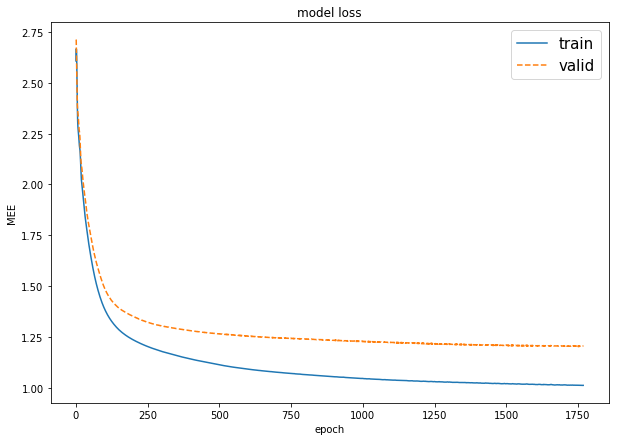

MEE (training) = 1.01249570251
MEE (validation) = 1.20344535601


In [73]:
models = []
for k in range(1,4):
    X_train, X_valid, y_train, y_valid = split_cross_validation(cup_tr_X,cup_tr_y,k,K_fold)
    models.append(train_model_regression(X_train, y_train, X_valid, y_valid, epochs=1800, validation_split=0.0, 
                                         neurons_hidden=16, lr=0.2, momentum_alpha=0.9, reg_lambda=0.0015))

# per ogni modello ottenuto nella cross validation faccio la media, ad ogni epoca, dei valori di loss ottenuti
loss_train_values_averaged = np.mean(np.array(map(lambda x: x['loss_values_train'][31:], models)), axis=0)
loss_valid_values_averaged = np.mean(np.array(map(lambda x: x['loss_values_valid'][31:], models)), axis=0)

# Uso un oggetto in cui inserisco la media delle tre liste di valori, per passarlo alla funzione di plot
avg_model_stats = {'loss_values_train': loss_train_values_averaged, 'loss_values_valid': loss_valid_values_averaged}  
plot_loss_accuracy(model= avg_model_stats, print_accuracy=False)
print "MEE (training) =", avg_model_stats['loss_values_train'][-1]
print "MEE (validation) =", avg_model_stats['loss_values_valid'][-1]

## Test

In [75]:
#BEST ---> {'loss_train': 1.064688923692054, 'hyperparam': (0.2, 0.6, 0.001), 'loss_valid': 1.2335722603965305}

mlcup_best_model = train_model_regression(cup_tr_X, cup_tr_y, validation_split=0.0 ,lr=0.2, neurons_hidden=16,
                                          momentum_alpha=0.9, epochs=1800, reg_lambda=0.0015)
mlcup_predicted_test = predict_values(model= mlcup_best_model, X=cup_ts_X, classification=False)
print "MEE (test) =", MEE(y_pred=mlcup_predicted_test, y_true=cup_ts_y)

MEE (test) = 1.15256817098


## BLIND TEST
#### viene fatto lo scatter plot dei punti predetti per il blind test set rispetto ai punti (etichette) del training set

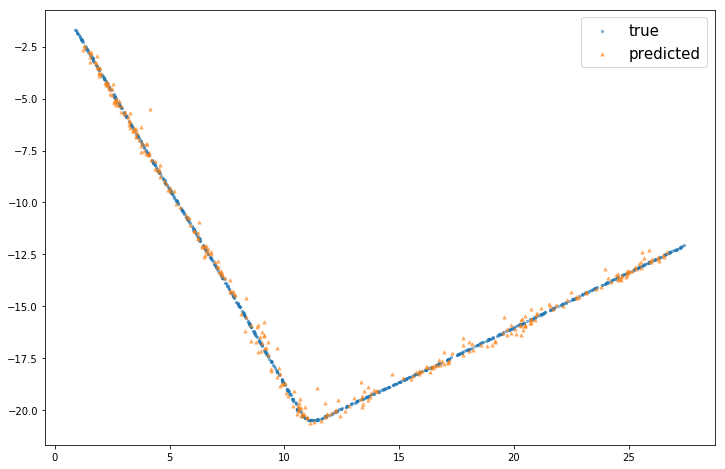

In [39]:

mlcup_model_test = train_model_regression(cup_tr_X, cup_tr_y, validation_split=0.0 ,lr=0.2, neurons_hidden=16,
                                          momentum_alpha=0.6, epochs=1800, reg_lambda=0.001)
mlcup_predicted_blind_test = predict_values(model=mlcup_model_test, X=cup_blind_ts_X, classification=False)
plot_point_cup(mlcup_predicted_blind_test, cup_tr_y)

In [43]:
# writing down result to csv

df_results = pd.DataFrame(mlcup_predicted_blind_test, index=range(1,len(df_results)+1))
with open('Ettore-Antonio_ML-CUP17-TS.csv', 'w') as f:
    f.write('# Ettore Puccetti, Antonio Ritacco\n')
    f.write('# Ettore-Antonio\n')
    f.write('# ML-CUP17\n')
    f.write('# 01/06/2018\n')
df_results.to_csv('Ettore-Antonio_ML-CUP17-TS.csv', mode='a', header=None)